In [1]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [2]:
im = cv2.imread('scanned-form.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [3]:
def show_im(im):
    plt.figure(figsize=(5,5))
    plt.imshow(im, cmap='gray')

In [4]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
 
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
 
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
 
    # return the ordered coordinates
    return rect

In [5]:
def process_image(img, sobel_kernel=3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    abs_sobelx = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    return abs_sobelx, abs_sobely

In [6]:
def get_center_contour(cnt):
    M = cv2.moments(con)
    return (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

In [7]:
#Get corners paper
thres = cv2.adaptiveThreshold(im, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,31,28)
im2, cnts, hierarchy = cv2.findContours(thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
draw_im = np.zeros_like(thres)
h, w = draw_im.shape

draw_ori_im = im.copy()

# find the main island (biggest area)
cnt = cnts[0]
max_area = cv2.contourArea(cnt)
cX,cY = 0,0
for i,con in enumerate(cnts):
    if cv2.contourArea(con) > max_area:
        cnt = con
        cX, cY = get_center_contour(cnt)
        max_area = cv2.contourArea(con)
# define main island contour approx. and hull
perimeter = cv2.arcLength(cnt.copy(),True)
epsilon = 0.01*cv2.arcLength(cnt.copy(),True)
approx = cv2.approxPolyDP(cnt.copy(),epsilon,True)

cv2.circle(draw_ori_im, (cX, cY), 9, (155, 155, 0), 8)
cv2.drawContours(draw_ori_im, approx, -1, (122, 100, 255), 18)

array([[ 36,  38,  36, ...,  85,  92,  93],
       [ 32,  32,  37, ...,  98,  95,  95],
       [ 38,  36,  42, ...,  95, 103, 106],
       ...,
       [  0,   1,   1, ...,  29,  29,  22],
       [  1,   1,   1, ...,  29,  27,  18],
       [  1,   1,   1, ...,  27,  24,  14]], dtype=uint8)

<IPython.core.display.Javascript object>


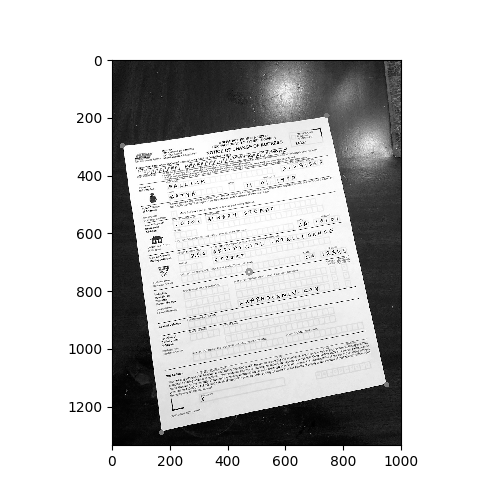

In [8]:
show_im(draw_ori_im)

<IPython.core.display.Javascript object>


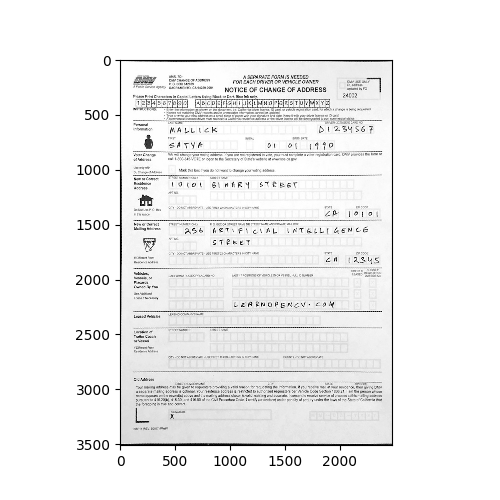

In [9]:
dst_point = np.float32([[0,0], [2480,0],[2480,3508], [0,3508] ])
coners_obj = order_points(np.float32([x[0] for x in approx.copy()]))
PT = cv2.getPerspectiveTransform(coners_obj,dst_point)
dst = cv2.warpPerspective(im.copy(),PT,(2480, 3508))
show_im(dst)